# High-flux electrospray sample injector for X-ray laser imaging

Particle density considerations for the application of a high-flux electrospray ionization source as a sample injector for single particle imaging with XFELs.

In [3]:
%pylab inline
import scipy.constants as constants
import seaborn as sns
sns.set(font_scale=1.5) 
sns.set_style('white')

Populating the interactive namespace from numpy and matplotlib


### Physical units and constants

In [4]:
# Prefixes
kilo = 1E3
milli = 1e-3
micro = 1e-6
nano = 1e-9
pico = 1e-12

# Time
second = 1.
minute = 60.*second
hour = 60.*minute

# Frequency
Hz = 1.
kHz = 1E3*Hz
MHz = 1E6*Hz
GHz = 1E9*Hz

# Current
ampere = 1.
mA = milli*ampere
uA = micro*ampere
nA = nano*ampere
pA = pico*ampere

# Mass
kg = 1.
u = constants.u * kg
Da = u
kDa = kilo*Da

# Charge
coulomb = 1.
electron = constants.e * coulomb
pAh = pA*hour

# Voltage
V = 1.

# Energy
joule = 1.
eV = electron

# Length
meter = 1.
mm = milli*meter
um = micro*meter

# Volume
liter = (0.1*meter)**3
mL = milli*liter
uL = micro*liter
nL = nano*liter

# Number
mol = constants.N_A
mmol = milli*mol
umol = micro*mol
nmol = nano*mol

# Constants
eps0 = constants.epsilon_0

## 1) Electrospray

### 1.1) Electrospray flow rate

In [5]:
print "EXP. PARAMETERS:"

# Concentration (1/m3)
c = 10 * umol/liter
print "Molecule concentration:  \t c = %.1f uM" % (c/(umol/liter))

# Volumetric flow rate (m3/sec) of sample solution
flow = 100 * nL/minute
print "Liquid volume flow rate: \t f = %.3f mL/hour (%.2f nL/min)" % (flow/(mL/hour), flow/(nL/minute))

print ""
print "RESULT:"

# => Molecular flow rate (1/sec)
F_ES = lambda flow, c: flow * c
print "Molecular flow rate:    \t F_ES = %.3e 1/sec" % (F_ES(flow, c))

EXP. PARAMETERS:
Molecule concentration:  	 c = 10.0 uM
Liquid volume flow rate: 	 f = 0.006 mL/hour (100.00 nL/min)

RESULT:
Molecular flow rate:    	 F_ES = 1.004e+10 1/sec


### 1.2) Electrospray ion current

In [6]:
print "EXP. PARAMETERS:"

# Charge state for Haemoglobin
z = 17
q = z*electron
print "Charge state: \t z = %i" % z

print ""
print "RESULT:"

# => Ion current of electrospray (A)
I_ES = lambda f, c, z: z * electron * F_ES(f, c)
print "Ion current of electrospray: \t %.2f nA" % (I_ES(flow, c, z)/(nano*ampere))

EXP. PARAMETERS:
Charge state: 	 z = 17

RESULT:
Ion current of electrospray: 	 27.34 nA


## 2) Molecules in vacuum amenable for imaging

### 2.1) Molecule velocity at interaction point

In [7]:
print "EXP. PARAMETERS:"

# Mass of Heamoglobin
m = 64000*u
print "Molecular mass: \t %.1f kDa" % (m/kDa)

# Kinetic energy of ions
E = 5*eV
print "Kinetic energy: \t %.1f eV" % (E/eV)

print ""
print "RESULT:"

# Velocity
v = lambda E, m: sqrt(2*E/m)
print "Velocity of ions: \t %.1f m/s" % (v(E, m))

EXP. PARAMETERS:
Molecular mass: 	 64.0 kDa
Kinetic energy: 	 5.0 eV

RESULT:
Velocity of ions: 	 122.8 m/s


### 2.2) Molecule flux and density at interaction point

In [8]:
print "EXP. PARAMETERS"

# Effective ion current
I_eff = 100 * pA
print "Effective ion current: \t %.1f pA (transmission = %.2f %%)" % (I_eff/pA, I_eff/I_ES(flow, c, z)*100.)

# Particle beam diameter
d_beam = 100 * um
print "Particle beam diameter:\t %.1f um" % (d_beam/um)

# X-ray beam diameter
d_xray = 1 * um
print "X-ray beam diameter: \t %.1f um" % (d_xray/um)

print "RESULT:"

# Beam cross section
A_beam = lambda d_beam: pi*(d_beam/2.)**2
print "Beam cross section:         \t %.1f um2" % (A_beam(d_beam)/(um)**2)

# Fill volume in one second
V_per_sec = lambda d_beam, E, m: A_beam(d_beam)*v(E, m)
print "Beam fills volume per second: \t %.2f mm3/s" % (V_per_sec(d_beam, E, m)/(mm**3/second))

# Particle flux
F_eff = lambda I_eff, z: I_eff/(z*electron)
print "Particle flux:           \t %.3e 1/sec" % F_eff(I_eff, z)

# Particle number density
rho = lambda I_eff, z, d_beam, E, m: F_eff(I_eff, z) / V_per_sec(d_beam, E, m)
print "Particle number density: \t %.3e 1/um3" % (rho(I_eff, z, d_beam, E, m)*um**3)

# Hit ratio
hit_ratio = lambda I_eff, z, d_beam, E, m, d_xray: rho(I_eff, z, d_beam, E, m) * (d_xray**2*d_beam)
print "Hit ratio:              \t %.1f %%" % (hit_ratio(I_eff, z, d_beam, E, m, d_xray)*100.)

EXP. PARAMETERS
Effective ion current: 	 100.0 pA (transmission = 0.37 %)
Particle beam diameter:	 100.0 um
X-ray beam diameter: 	 1.0 um
RESULT:
Beam cross section:         	 7854.0 um2
Beam fills volume per second: 	 964.34 mm3/s
Particle flux:           	 3.671e+07 1/sec
Particle number density: 	 3.807e-05 1/um3
Hit ratio:              	 0.4 %


### 2.3) Molecule bunching for EuXFEL


<img src="euxfel_time_structure.png" alt="Drawing" style="width: 600px;"/>

*Reference:* Schneidmiller and Yurkov, 2011 (doi:10.3204/DESY11-152)

In [9]:
print "EXP. PARAMETERS:"

t_period = 100. * milli*second
print "Time between trains:    \t %.1f us" % (t_period/(micro*second))
f_period = 1/t_period
print "Train frequency: \t\t %.1f Hz" % (f_period/Hz)

t_pulse = 220. * nano*second
print "Time between pulses in train: \t %.3f us" % (t_pulse/(micro*second))
f_pulse = 1/t_pulse
print "Pulses frequency in train: \t %.3f MHz" % (f_pulse/MHz)

t_train = 600. * micro*second
print "Pulse train duration:    \t %.1f us" % (t_train/(micro*second))


print ""
print "RESULT"

bunching_factor = lambda t_period, t_train: t_period/t_train
print "Increase of hit ratio if ions bunched in sync with trains: Bunching factor %.1f" % bunching_factor(t_period, t_train) 

ion_bunch_length = lambda t_train, E, m: t_train*v(E, m)
print "Desired ion bunch length: \t %.1f mm" % (ion_bunch_length(t_train, E, m)/mm)

hit_ratio_bunched = lambda I_eff, z, d_beam, E, m, d_xray, t_period, t_train: hit_ratio(I_eff, z, d_beam, E, m, d_xray) * bunching_factor(t_period, t_train) 
print "Hit ratio if using ion bunching: %.1f %%" % (hit_ratio_bunched(I_eff, z, d_beam, E, m, d_xray, t_period, t_train)*100.)

EXP. PARAMETERS:
Time between trains:    	 100000.0 us
Train frequency: 		 10.0 Hz
Time between pulses in train: 	 0.220 us
Pulses frequency in train: 	 4.545 MHz
Pulse train duration:    	 600.0 us

RESULT
Increase of hit ratio if ions bunched in sync with trains: Bunching factor 166.7
Desired ion bunch length: 	 73.7 mm
Hit ratio if using ion bunching: 63.5 %


### 2.4) Particle velocities and X-ray pulse separation

Min. velocity to repopulate interaction volume between pulses: 4.5 m/s


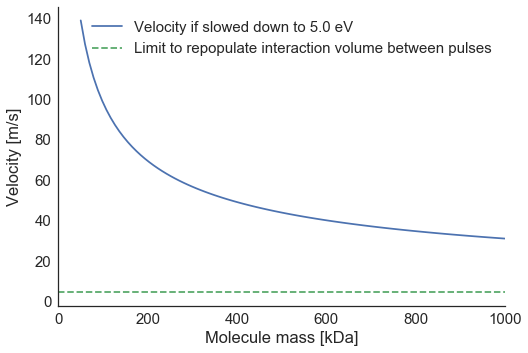

In [10]:
m_arr = linspace(50, 1000, 100) * kDa
v_arr = v(E, m_arr)
plot(m_arr/kDa, v_arr, label="Velocity if slowed down to %.1f eV" % (E/eV))
v_min = lambda d_xray, t_pulse: d_xray/t_pulse
print "Min. velocity to repopulate interaction volume between pulses: %.1f m/s" % (v_min(d_xray, t_pulse))
axhline(v_min(d_xray, t_pulse), ls="--", color="C1", label="Limit to repopulate interaction volume between pulses")
xlim(0, 1000)
xlabel("Molecule mass [kDa]")
ylabel("Velocity [m/s]")
legend()
sns.despine()

### 2.5) Hit ratio as a function of molecule beam width

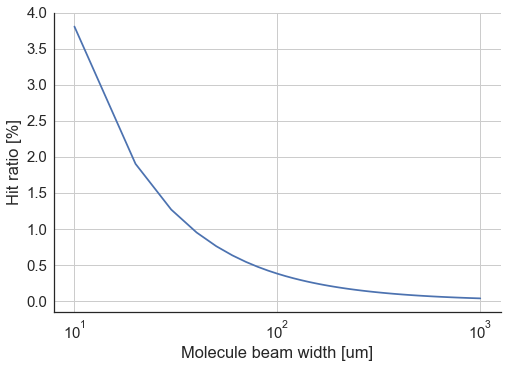

In [11]:
d_beam_arr = linspace(10, 1000, 100) * um
hit_ratio_arr = hit_ratio(I_eff, z, d_beam_arr, E, m, d_xray)
semilogx(d_beam_arr/um, hit_ratio_arr*100.)
grid(True)
xlabel("Molecule beam width [um]")
ylabel("Hit ratio [%]")
sns.despine()

### 2.6) Hit ratio as a function of bunching factor

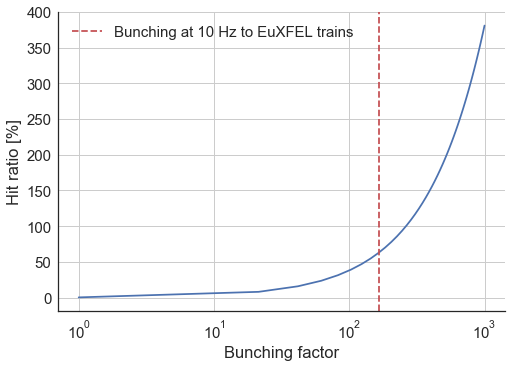

In [12]:
bunching_factor_arr = linspace(1, 1E3)
hit_ratio_bunched_arr = hit_ratio_bunched(I_eff, z, d_beam, E, m, d_xray, bunching_factor_arr, 1.)
semilogx(bunching_factor_arr, hit_ratio_bunched_arr*100.)
axvline(bunching_factor(t_period, t_train), ls="--", color="C2", label="Bunching at 10 Hz to EuXFEL trains")
grid(True)
xlabel("Bunching factor")
ylabel("Hit ratio [%]")
legend()
sns.despine()

## 3) Space-charge limit

### 3.1) Solving equation of motion for ions accelerated by space charge

- Gauss' law:

  $$\frac{Q}{\epsilon_0}=E \cdot A=E \cdot \text{d}z 2 \pi R $$

- Total charge

  $$Q = \text{d}z \rho \pi R^2$$

- Charge density expressed with electrical current and velocity
  
  $$\rho = \frac{I}{\pi R^2 v_z}$$

- Electric field
  
  $$E = \frac{I}{2\pi\epsilon_0 R v_z}$$

- Equation of motion in radial direction
  
  $$m \frac{\text{d}^2}{\text{d}t^2} R = F = q E$$
  
- Change of variable

  $$\frac{\text{d}^2}{\text{d}t^2} = v_z^2 \frac{\text{d}^2}{\text{d}z^2}$$
  
- Define dimensionless parameter (generalised perveance)
 
  $$K = \frac{qI}{2\pi\epsilon_0 mv_z^3}$$

- Transition equation of motion into trajectory equation

  $$\frac{\text{d}^2}{\text{d}t^2} R = \frac{qI}{2\pi\epsilon_0 mv_z^3} \frac{1}{R} = K \frac{1}{R}$$
  
- Solution 

  (S. Humphries, Charged Particle Beams (John Wiley & Sons, New York, 1990), chapter 5.4. Space-charge expansion of a drifting beam)

  $$z=\frac{R}{\sqrt{2K}} F(R/R_0)$$
  
  Need numerical integration for determining $F(R/R_0)$:
  
  $$F(R/R_0) = \int_1^{R/R_0} \frac{\text{d}y}{\log y}$$
  


In [13]:
import scipy.integrate as integrate
import collections
K = lambda I, v, m, q: q*I/(2*pi*eps0*m*v**3)
z = lambda R, R0, I, v, m, q: R0 / sqrt(2*K(I, v, m, q)) * _F(R, R0)
_F = lambda R, R0: numpy.asarray([integrate.quad(lambda y: 1./sqrt(log(y)), a=1., b=_R/R0)[0] for _R in (R if isinstance(R, collections.Iterable) else [R])])
rayleigh_length = lambda R0, I, v, m, q: z(R=2*R0, R0=R0, I=I, v=v, m=m, q=q)

In [14]:
# Check code
# "As an example, a parallel zero-emittance beam of 181Ta20+ accelerated with 60 kV has initial
#  radius of r0 = 15 mm. The size of a 120 mA beam after a drift of 100 mm can be solved from
#  F(r/r0) = 1.189, which gives r = 20 mm"
_q = 20*electron
_m = 181*Da
_U = 60E3*V
_v = sqrt(2*_q*_U/_m)
assert isclose(_F(20E-3, 15E-3), 1.189, atol=0.01) # Need to set the tolerance a little higher than I'ld expect
assert isclose(z(R=20E-3, R0=15E-3, I=120*mA, v=_v, m=_m, q=_q)[0], 100*mm, atol=1*mm)

**Particle density:**

$$\rho_n = q \cdot \rho = \frac{I}{q \pi R^2 v_z}$$

In [15]:
# Particle density
rho_n = lambda R, I, v, q: I/(q*pi*R**2*v)

Without bunching:
Beam radius     	R0	= 50.0 um
Molecule charge 	q	= 17.0 e
Molecule mass   	m	= 64.0 kDa
Beam current    	I	= 0.1 nA
Acc. voltage    	U	= 0.29 V
Kinetic energy  	E	= 5.0 eV
Particle speed  	v	= 122.8 m/s
Rayleigh length 	L	= 0.481 mm

(100,)


/Users/max.hantke/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


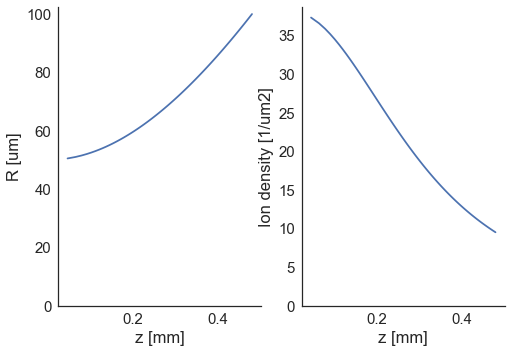

With bunching:
Beam radius     	R0	= 50.0 um
Molecule charge 	q	= 17.0 e
Molecule mass   	m	= 64.0 kDa
Beam current    	I	= 16.7 nA
Acc. voltage    	U	= 0.29 V
Kinetic energy  	E	= 5.0 eV
Particle speed  	v	= 122.8 m/s
Rayleigh length 	L	= 0.037 mm

(100,)


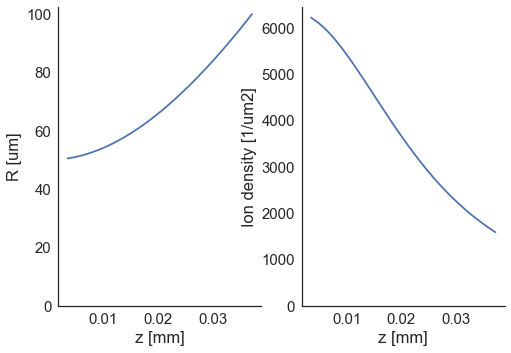

In [21]:
Is = {
    "Without bunching" : 100 * pA,
    "With bunching"    : 100 * pA * bunching_factor(t_period=t_period, t_train=t_train),
}
for txt, I in Is.items():
    R0 = 50*um
    E  = 5*eV
    v  = sqrt(2*E/m)
    U  = E/q
    print "%s:" % txt
    print "Beam radius     \tR0\t= %.1f um" % (R0/um)
    print "Molecule charge \tq\t= %.1f e" % (q/electron)
    print "Molecule mass   \tm\t= %.1f kDa" % (m/kDa)
    print "Beam current    \tI\t= %.1f nA" % (I/nA)
    print "Acc. voltage    \tU\t= %.2f V" % (U/V)
    print "Kinetic energy  \tE\t= %.1f eV" % (E/eV)
    print "Particle speed  \tv\t= %.1f m/s" % (v)
    print "Rayleigh length \tL\t= %.3f mm" % (rayleigh_length(R0=R0, I=I, v=v, q=q, m=m)/mm)
    print ""
    R_arr = linspace(R0, 2*R0, 100)
    z_arr = z(R=R_arr, R0=R0, I=Il, v=v, m=m, q=q)
    print z_arr.shape
    fig, axs = subplots(1, 2)
    axs[0].plot(z_arr/mm, R_arr/um)
    axs[0].set_xlabel("z [mm]")
    axs[0].set_ylabel("R [um]")
    axs[0].set_ylim(0, None)
    sns.despine()
    rho_n_arr = rho_n(R=R_arr, I=I, v=v, q=q)
    axs[1].plot(z_arr/mm, rho_n_arr/(1/um**2))
    axs[1].set_xlabel("z [mm]")
    axs[1].set_ylabel("Ion density [1/um2]")
    axs[1].set_ylim(0, None)
    show()

In [ ]:
(3.5**2)